In [8]:
# Initial Set-Up

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import StandardScaler
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from numpy import where
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score
from sklearn import metrics

#### 1. Look up SMOTE oversampling https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html. 

##### a. Describe what it is in your own words in markdown.

SMOTE stands for Synthetic Minority Over-sampling Technique.  This technique creates new syntheticized data (rather than simply making copies of existing data).  It starts by randomly selecting a minority data example.  It uses KNN, taking the five nearest neighbors and randomly selecting one of the five.  Then a line is drawn from the randomly selected example to the randomly selected nearest neighbor.  The new, synthesized data point is placed at a randomly selected point on the line between the first two points.

##### b. Use this technique with the diabetes dataset. Comment on the model performance compared to other methods. Make sure you are clear about why you chose the performance metric you did.

In [2]:
diabetes = pd.read_csv("../wk_13_hmwk/diabetes.csv")
diabetes_df = pd.DataFrame(diabetes)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
features = diabetes.columns+'_scaled'
scaler = StandardScaler().fit(diabetes)
scaled = scaler.transform(diabetes)
scaled_df=pd.DataFrame(scaled)
scaled_df.columns = features
scaled_df.head()

,Pregnancies_scaled,Glucose_scaled,BloodPressure_scaled,SkinThickness_scaled,Insulin_scaled,BMI_scaled,DiabetesPedigreeFunction_scaled,Age_scaled,Outcome_scaled
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896


Counter({0: 500, 1: 268})


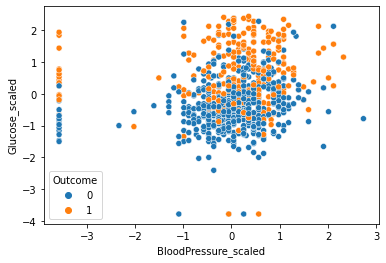

In [12]:
X = scaled_df.drop("Outcome_scaled", axis=1)
y = diabetes_df["Outcome"]

# Graph the initial (imbalanced) dataset for visualization by class
sns.scatterplot("BloodPressure_scaled", "Glucose_scaled", data = X, hue = y)

# summarize class distribution
counter = Counter(y)
print(counter)

In [13]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

# Fit Logistic Regression model to training data set
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on test data set
y_pred = model.predict(X_test)

print("Accuracy: ", model.score(X_test, y_test))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.7965367965367965
Precision: 0.7758620689655172
Recall: 0.569620253164557


Counter({1: 500, 0: 500})


<AxesSubplot:xlabel='BloodPressure_scaled', ylabel='Glucose_scaled'>

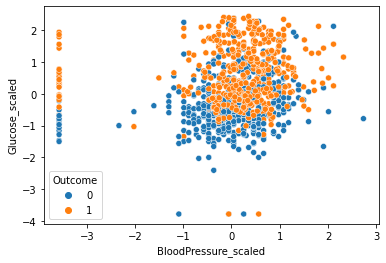

In [11]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

# Graph the oversampled dataset (again, for visualization only)
sns.scatterplot("BloodPressure_scaled", "Glucose_scaled", data = X, hue = y)

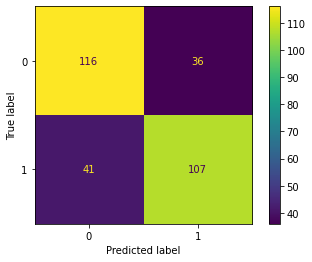

In [10]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

# Fit Logistic Regression model to training data set
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on test data set
y_pred = model.predict(X_test)

#Check performance with R2 score and confusion matrix
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

In [9]:
print("Accuracy: ", model.score(X_test, y_test))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.7433333333333333
Precision: 0.7482517482517482
Recall: 0.722972972972973


Recall is the most important performance metric in this situation because in properly diagnosing a disease, we want to minimize the false negatives.  A high recall score means a low percentage of false negatives.

Of the various models used with the diabetes dataset in recent assignments, here's what I have found:

Multiple Logistic Regression alone --> 80% accuracy, 57% recall
SMOTE with Multiple Logistic Regression --> 82% accuracy, 62% recall
SMOTE with Multiple Logistic Regression with class_weight = 'balanced" -->  74% accuracy, 76% recall
KNN --> 75% accuracy, 57% recall

It is clear that using SMOTE is a good idea with the diabetes dataset.  It's debatable as to whether class weight should be balanced or not.  The accuracy is markedly higher without class weight balancing, but the recall is markedly higher with it.


##### 2. Create a function called rec_digit_sum that takes in an integer. This function is the recursive sum of all the digits in a number.  Given n, take the sum of all the digits in n. If the resulting value has more than one digit, continue calling the function in this way until a single-digit number is produced. The input will be a non-negative integer, and this should work for extremely large values as well as for single-digit inputs.

##### Examples:
##### 16 --> 1 + 6 = 7
##### 942 --> 9 + 4 + 2 = 15 --> 1 + 5 = 6
##### 132189 --> 1 + 3 + 2 + 1 + 8 + 9 = 24 --> 2 + 4 = 6
##### 493193 --> 4 + 9 + 3 + 1 + 9 + 3 = 29 --> 2 + 9 = 11 --> 1 + 1 = 2

In [15]:
def rec_digit_sum(x):
    string = str(x)
    added = 0
    try:
        for i in string:
            added = added + int(i)
    
        if added > 10:
            rec_digit_sum(added)
        else:
            print ("Recursive Sum of Digits = ", added)
    except Exception as e:
        print(e)
    

In [16]:
rec_digit_sum(941561561)

Recursive Sum of Digits =  2
